# Scelta ottimale dell'iperparametro $k$
In questo notebook, esploreremo l'algoritmo K-Nearest Neighbors (KNN) e l'importanza della scelta del numero ottimale di vicini $k$. Vedremo come $k$ influisce sui confini di decisione, sulla precisione del modello, e sull'apprendimento. Alla fine, avremo una migliore comprensione di come scegliere il $k$ ottimale per il nostro modello KNN.

In [1]:
# Importare le librerie necessarie
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Caricare il dataset Iris
iris = load_iris(as_frame=True)

# Separare le feature (X) dal target (y)
X = iris.data
y = iris.target

# Ottenere i nomi delle feature e del target
features = X.columns
target = iris.target_names

# Creare un DataFrame combinato
df = pd.concat([X, y], axis=1)

# Visualizzare le prime righe del DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
# Estrazione delle feature di interesse
features = ["sepal length (cm)", "sepal width (cm)"]

# Divisione del dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.3, random_state=42)

# Normalizzazione dei dati
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

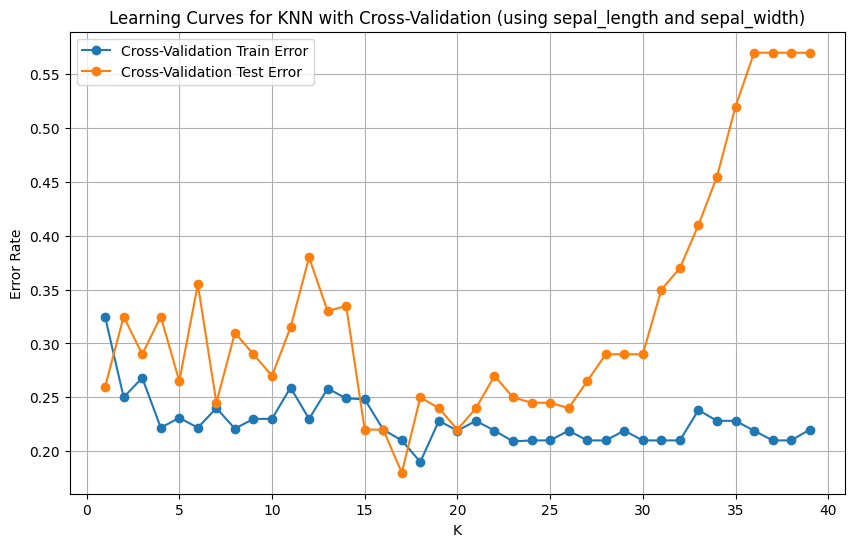

In [28]:
# Lista dei valori di k da testare
k_values = list(range(1, 40, 1))

train_errors = []
test_errors = []

# Addestrare il modello KNN per ogni valore di K e calcolare l'errore
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Usare cross_val_score per valutare il modello con 10-fold cross-validation sul train set
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')  # valutazione su 10 fold
    
    # Aggiungere l'errore alla lista degli errori
    train_errors.append(1 - cv_scores.mean())

    # Usare cross_val_score per valutare il modello con 10-fold cross-validation sul train set
    cv_scores = cross_val_score(knn, X_test_scaled, y_test, cv=10, scoring='accuracy')  # valutazione su 10 fold
    
    # Aggiungere l'errore alla lista degli errori
    test_errors.append(1 - cv_scores.mean())

# 4. Visualizzare le curve di apprendimento
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Cross-Validation Train Error', marker='o')
plt.plot(k_values, test_errors, label='Cross-Validation Test Error', marker='o')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Learning Curves for KNN with Cross-Validation on Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()

# Interpretazione delle Curve di Apprendimento per il Modello KNN

Questo grafico mostra le curve di apprendimento di un modello K-Nearest Neighbors (KNN) valutato tramite cross-validation per diversi valori di \( k \), utilizzando solo le caratteristiche `sepal_length` e `sepal_width` del dataset Iris. Il grafico traccia due curve:

1. **Cross-Validation Train Error (errore di addestramento)**: la curva blu mostra l'errore medio di addestramento per ciascun valore di \( k \).
2. **Cross-Validation Test Error (errore di test)**: la curva arancione mostra l'errore medio di cross-validation (test) per ciascun valore di \( k \).

## Interpretazione del Grafico

### Errore di Addestramento
- Con valori piccoli di \( k \) (vicini a 1), l'errore di addestramento è basso, indicando che il modello si adatta molto bene ai dati di addestramento. Tuttavia, c'è il rischio di overfitting, ossia che il modello si adatti troppo ai dati di addestramento e non generalizzi bene.
- Man mano che \( k \) aumenta, l'errore di addestramento cresce leggermente e poi si stabilizza. Questo perché, con \( k \) più grande, il modello diventa più semplice (media di più vicini) e tende a generalizzare meglio, riducendo il rischio di overfitting.

### Errore di Test
- L'errore di test (arancione) è inizialmente alto per valori piccoli di \( k \), il che può indicare che il modello non generalizza bene (overfitting).
- Intorno a \( k = 20 \), l'errore di test è al minimo, suggerendo che il modello ha trovato un buon compromesso tra bias e varianza.
- Con valori molto grandi di \( k \) (ad esempio, oltre \( k = 30 \)), l'errore di test aumenta drasticamente. Questo indica che il modello sta underfitting (ossia, è troppo semplice e non riesce a catturare le relazioni nei dati), perdendo la capacità di fare previsioni accurate.

## Conclusione
- **Trade-off Bias-Varianza**: Il grafico riflette il classico trade-off tra bias e varianza. Con valori piccoli di \( k \), il modello ha alta varianza e basso bias, mentre con valori grandi di \( k \), il bias aumenta e la varianza diminuisce.
- **Scelta di \( k \)**: Il valore di \( k \) ottimale è quello che minimizza l'errore di test (arancione). In questo caso, sembra che un valore di \( k \) compreso tra 15 e 25 offra il miglior compromesso, riducendo al minimo l'errore di generalizzazione.

Utilizzando queste informazioni, potresti selezionare un valore di \( k \) che bilancia in modo ottimale la capacità del modello di adattarsi ai dati di addestramento senza perdere la capacità di generalizzare a nuovi dati.

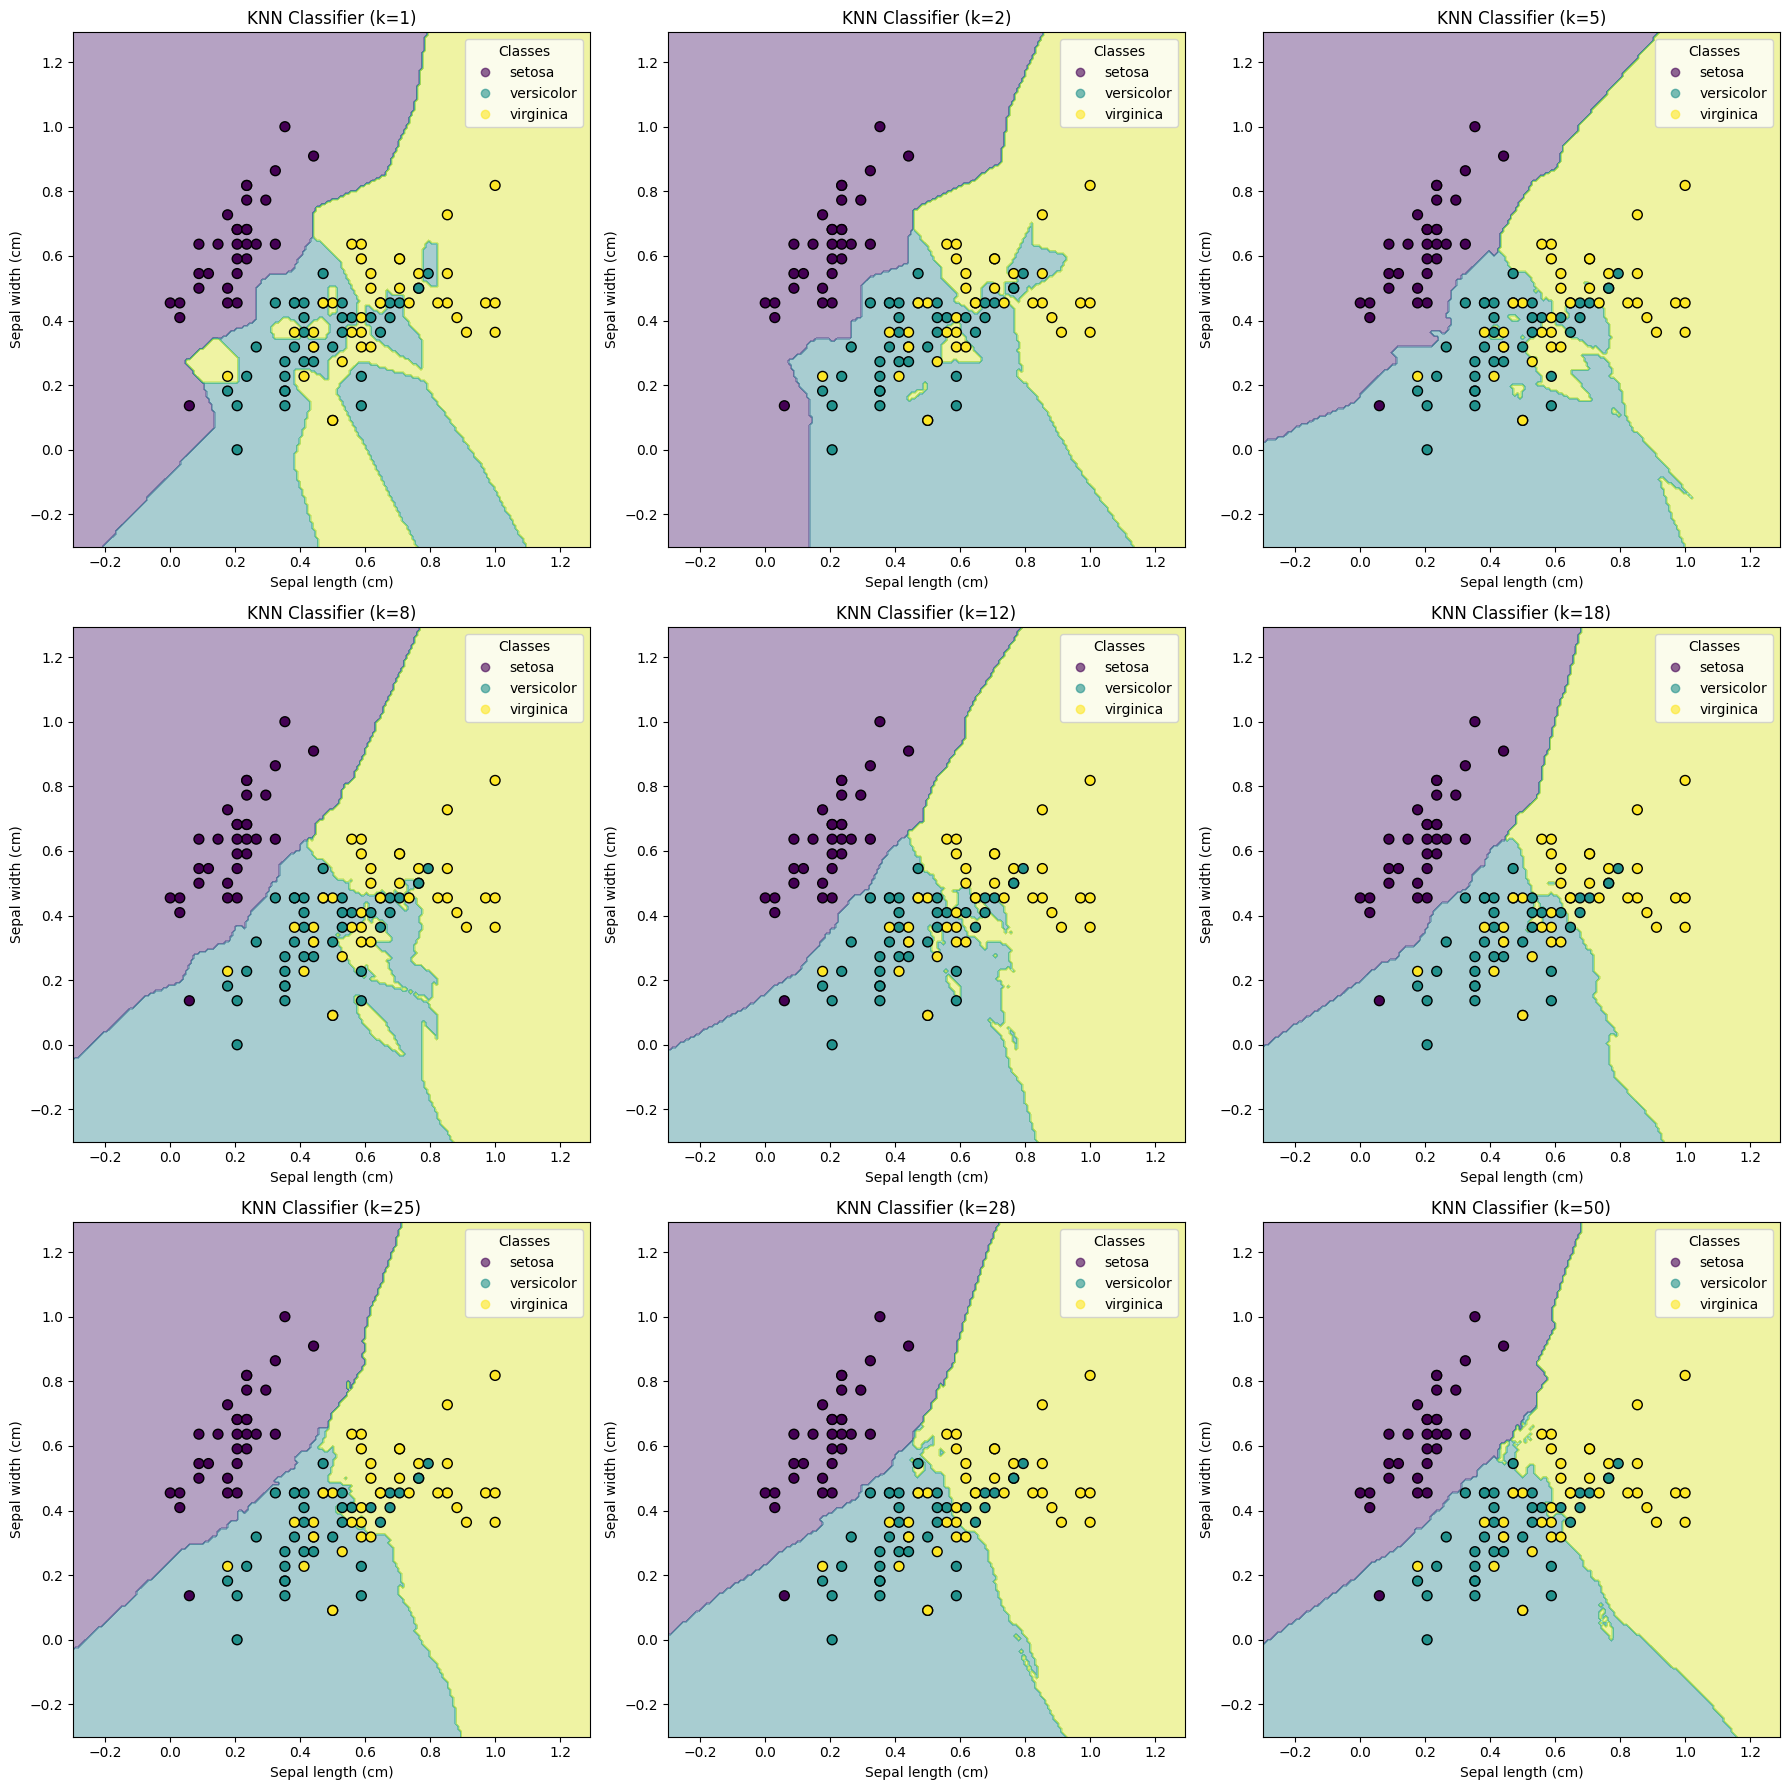

In [4]:
# Lista dei valori di k da testare
k_values = [1, 2, 5, 8, 12, 18, 25, 28, 50]

# Nomi degli assi
xlabel = 'Sepal length (cm)'
ylabel = 'Sepal width (cm)'

# Definizione della funzione per tracciare le decision boundaries utilizzando contourf
def plot_decision_boundaries(X, y, model, ax, title):
    h = 0.008  # Passo della mesh
    x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
    y_min, y_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Creazione manuale della legenda
    handles, _ = scatter.legend_elements(prop="colors", alpha=0.6)
    ax.legend(handles=handles, labels=list(iris.target_names), title="Classes")

# Creazione della figura
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Iterazione sui valori di k e plot delle decision boundaries
for i, k in enumerate(k_values):

    # Addestramento del modello KNN
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', n_jobs=-1)
    knn.fit(X_train_scaled, y_train)

    # Tracciare le decision boundaries
    ax = axes[i // 3, i % 3]  # Posizione nella griglia 2x3
    plot_decision_boundaries(X_train_scaled, y_train, knn, ax, f'KNN Classifier (k={k})')

plt.tight_layout()
plt.show()

# Interpretazione dei Confini di Decisione per il Modello KNN

Questo grafico rappresenta nove diverse visualizzazioni dei confini di decisione di un modello K-Nearest Neighbors (KNN) applicato al dataset Iris, considerando solo le caratteristiche `sepal_length` e `sepal_width`. Ogni subplot rappresenta il comportamento del modello per un diverso valore di \( k \), variabile che determina il numero di vicini considerati dal modello per classificare un nuovo punto.

## Interpretazione dei Subplot:

1. **\( k = 1 \)**:
   - **Descrizione**: Quando \( k \) è pari a 1, ogni punto viene classificato in base al suo singolo vicino più vicino. Questo porta a confini di decisione molto irregolari e complessi, che seguono fedelmente i dati di addestramento.
   - **Interpretazione**: Il modello è altamente flessibile, ma anche estremamente suscettibile all'overfitting, poiché può adattarsi molto ai punti rumorosi o a piccole variazioni nei dati.

2. **\( k = 2 \) e \( k = 5 \)**:
   - **Descrizione**: Aumentando \( k \), i confini di decisione diventano più lisci e meno complessi. Con \( k = 5 \), il modello inizia a generalizzare meglio.
   - **Interpretazione**: Il modello diventa meno sensibile ai dati rumorosi e inizia a formare regioni più ampie e coerenti per ogni classe, riducendo il rischio di overfitting.

3. **\( k = 8 \) e \( k = 12 \)**:
   - **Descrizione**: Per valori di \( k \) tra 8 e 12, i confini di decisione continuano a lisciarsi e le aree di confine tra le classi diventano più regolari. Il modello tende a ignorare piccole fluttuazioni nei dati.
   - **Interpretazione**: Questo rappresenta un buon compromesso tra bias e varianza. Il modello è in grado di generalizzare bene senza sacrificare troppa accuratezza.

4. **\( k = 18 \) e \( k = 25 \)**:
   - **Descrizione**: Aumentando ancora di più \( k \), i confini diventano ancora più regolari e le decisioni di classificazione sono influenzate da un numero maggiore di punti vicini.
   - **Interpretazione**: Il modello inizia a diventare troppo rigido (aumento del bias), il che potrebbe portare a un underfitting, specialmente se il numero di classi è piccolo o se i dati non sono ben separati.

5. **\( k = 28 \) e \( k = 50 \)**:
   - **Descrizione**: Con \( k = 28 \) e soprattutto con \( k = 50 \), il modello diventa molto conservativo. I confini di decisione sono estremamente lisci e non tengono conto delle peculiarità locali dei dati.
   - **Interpretazione**: Il modello ha un alto bias, ignorando completamente le piccole strutture nei dati. Questo porta a un underfitting significativo, dove il modello non riesce a catturare correttamente la complessità dei dati e può risultare in una scarsa performance.

## Conclusione
- **Overfitting vs. Underfitting**: I primi subplot (k piccoli) mostrano un chiaro caso di overfitting, dove il modello si adatta troppo ai dati di addestramento. Con l'aumento di \( k \), i confini di decisione diventano progressivamente più lisci, riducendo il rischio di overfitting ma aumentando il rischio di underfitting.
- **Scelta del valore di \( k \)**: Il valore di \( k \) che rappresenta il miglior compromesso dipende dal dataset specifico, ma generalmente valori intermedi di \( k \) (ad esempio tra 5 e 15) tendono a offrire un buon equilibrio tra la flessibilità del modello e la sua capacità di generalizzare.

Questa visualizzazione ti permette di capire meglio come la scelta del parametro \( k \) influisca sui confini di decisione del modello KNN e, di conseguenza, sulle sue prestazioni.

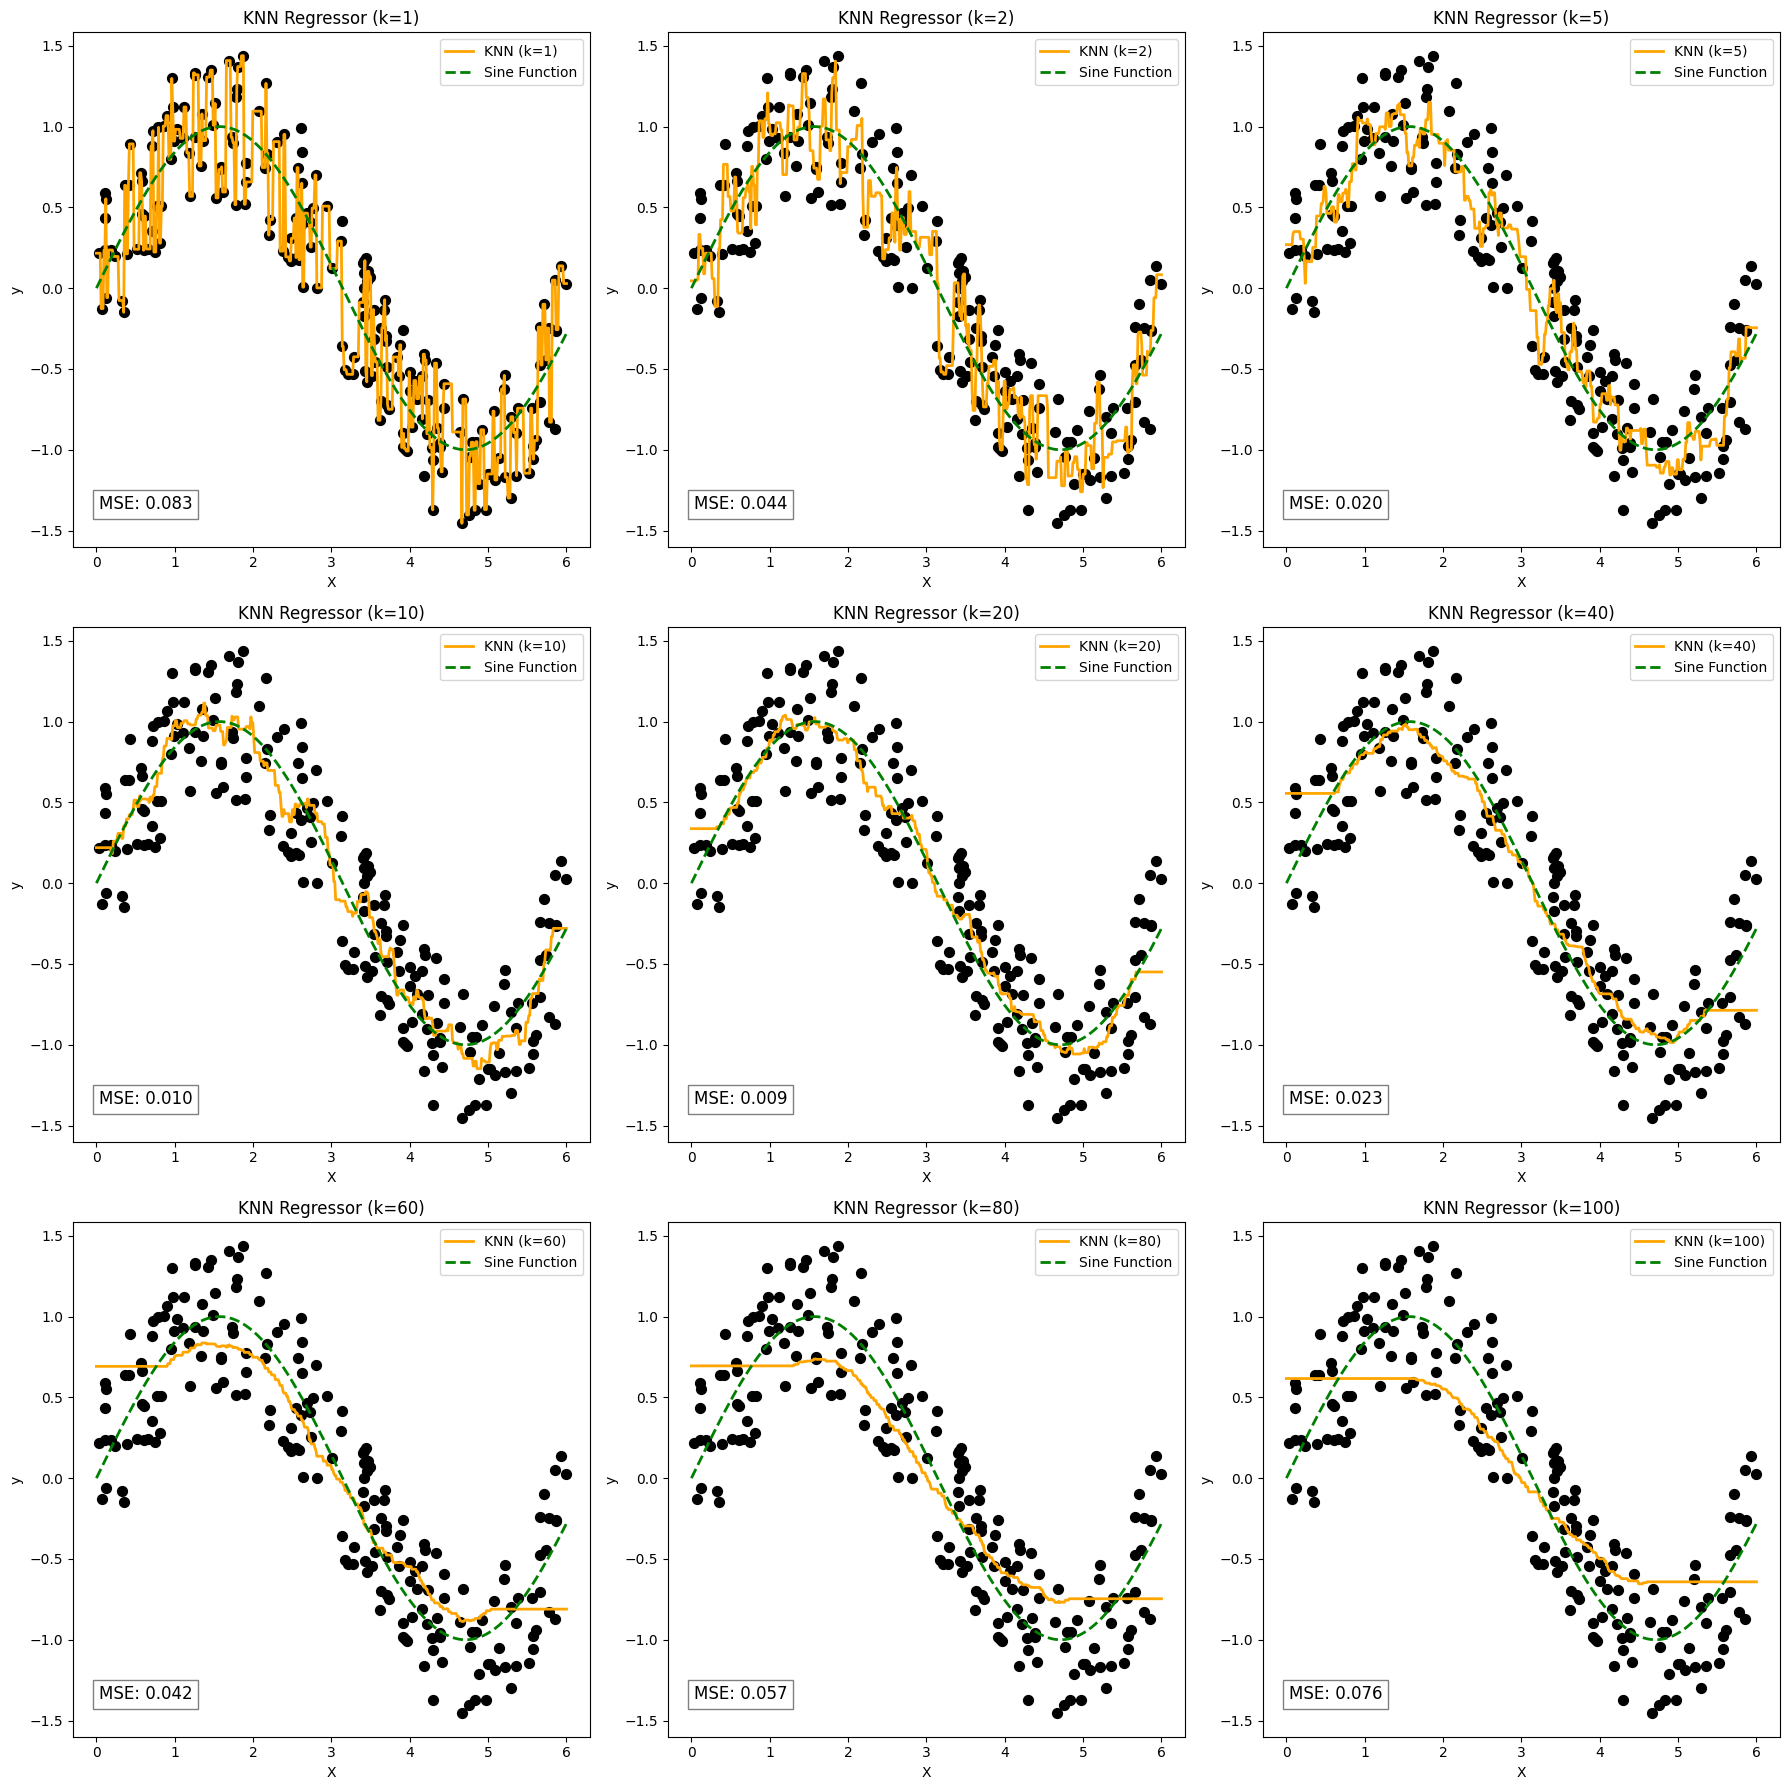

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generazione di dati fittizi
np.random.seed(0)
X = np.sort(6 * np.random.rand(200, 1), axis=0)
y = np.sin(X).ravel()

# Aggiunta di rumore al target
y += 1 * (0.5 - np.random.rand(200))

# Lista dei valori di k da testare (limitato a un massimo di 40)
k_values = [1, 2, 5, 10, 20, 40, 60, 80, 100]

# Creazione della figura
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Iterazione sui valori di k e plot dei risultati della regressione
for i, k in enumerate(k_values):
    # Addestramento del modello KNN Regressore
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X, y)

    # Generazione di previsioni
    X_plot = np.linspace(0, 6, 500)[:, np.newaxis]
    y_pred = knn_regressor.predict(X_plot)
    
    # Calcolo del MSE rispetto alla funzione seno originale
    mse = mean_squared_error(np.sin(X_plot), y_pred)
    
    # Tracciare la regressione, i punti dati e la funzione seno originale
    ax = axes[i // 3, i % 3]  # Posizione nella griglia 3x3
    ax.plot(X_plot, y_pred, color='orange', lw=2, label=f'KNN (k={k})')
    ax.plot(X_plot, np.sin(X_plot), color='green', lw=2, linestyle='--', label='Sine Function')
    ax.scatter(X, y, c='black', edgecolor='k', s=50)
    ax.set_title(f'KNN Regressor (k={k})')
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.legend()
    
    # Inserimento del valore di MSE nel grafico
    ax.text(0.05, 0.10, f'MSE: {mse:.3f}', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

## Analisi del Grafico: Scelta Ottimale di \(k\) nel KNN Regressore

Questo grafico fornisce un'ottima illustrazione di come la scelta del valore di \(k\) influenzi la prestazione del modello KNN in un contesto di regressione.

### Osservazioni Chiave:
1. **Valori Bassi di \(k\)**:
    - Per \(k = 1\) e \(k = 2\), il modello segue da vicino i dati di addestramento. Questa vicinanza ai dati può portare a un **overfitting**, dove il modello è molto sensibile al rumore presente nei dati. Questo si traduce in curve molto irregolari che non generalizzano bene al di fuori dei dati di addestramento.
    - L'MSE è relativamente alto per \(k = 1\) e \(k = 2\), indicando che il modello non è in grado di catturare adeguatamente l'andamento della funzione sottostante.

2. **Valori Medi di \(k\)**:
    - Per valori intermedi di \(k\) come \(k = 5\), \(k = 10\), e \(k = 20\), il modello bilancia meglio la complessità e la capacità di generalizzazione. La previsione segue più da vicino l'andamento della funzione seno, mantenendo al contempo una certa robustezza al rumore nei dati.
    - In particolare, per \(k = 10\) e \(k = 20\), l'MSE è il più basso, suggerendo che questi valori di \(k\) forniscono una buona approssimazione della funzione vera, minimizzando sia l'overfitting che l'underfitting.

3. **Valori Alti di \(k\)**:
    - Quando \(k\) aumenta ulteriormente, come per \(k = 40\), \(k = 60\), \(k = 80\), e \(k = 100\), il modello diventa troppo semplice, portando a **underfitting**. In questi casi, il modello media troppi punti vicini, perdendo la capacità di seguire la vera forma della funzione seno.
    - L'MSE aumenta notevolmente con l'aumento di \(k\), soprattutto per \(k = 60\) e superiori, indicando che il modello non riesce più a catturare la complessità della relazione tra \(X\) e \(y\).

### Conclusione:
- Il grafico mostra chiaramente che esiste un valore ottimale di \(k\) che minimizza l'MSE e permette al modello di catturare la vera relazione tra le variabili senza overfitting o underfitting. Nel contesto di questo esempio, sembra che valori di \(k\) tra 10 e 20 offrano il miglior compromesso tra bias e varianza.
- Questo tipo di analisi è cruciale in pratica, poiché la scelta di \(k\) deve essere fatta con attenzione per garantire che il modello KNN abbia buone proprietà predittive.